In [1]:
import requests
import pandas as pd
import numpy as np

In [7]:
#pip install lxml

Note: you may need to restart the kernel to use updated packages.


# Parsing Wikipedia and Creating Pandas DataFrame Table 

In [2]:
url = "https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M"
response = requests.get(url)
df = pd.read_html(response.content)[0]
df

,Postal code,Borough,Neighborhood
0,M1A,Not assigned,NaN
1,M2A,Not assigned,NaN
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,Regent Park / Harbourfront
...,...,...,...
175,M5Z,Not assigned,NaN
176,M6Z,Not assigned,NaN
177,M7Z,Not assigned,NaN
178,M8Z,Etobicoke,Mimico NW / The Queensway West / South of Bloo...


# Dropping Borough rows with "Not Assined" value
# Replacing '/' with ',' in Neighborhood column

In [3]:
df = df[df.Borough != 'Not assigned']
df['Neighborhood'] = df['Neighborhood'].str.replace('/',',')
df

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Postal code,Borough,Neighborhood
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,"Regent Park , Harbourfront"
5,M6A,North York,"Lawrence Manor , Lawrence Heights"
6,M7A,Downtown Toronto,"Queen's Park , Ontario Provincial Government"
...,...,...,...
160,M8X,Etobicoke,"The Kingsway , Montgomery Road , Old Mill North"
165,M4Y,Downtown Toronto,Church and Wellesley
168,M7Y,East Toronto,Business reply mail Processing CentrE
169,M8Y,Etobicoke,"Old Mill South , King's Mill Park , Sunnylea ,..."


# Checking to see "Not assigned" value in Neighborhood column

In [4]:
#df['Neighborhood'].where(df['Neighborhood'] == 'Not assigned')
df.loc[df['Neighborhood']=="Not assigned"]

,Postal code,Borough,Neighborhood


In [5]:
df['Neighborhood'] = np.where(df['Neighborhood']=='Not assigned',df['Borough'],df['Neighborhood'] )  
df

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Postal code,Borough,Neighborhood
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,"Regent Park , Harbourfront"
5,M6A,North York,"Lawrence Manor , Lawrence Heights"
6,M7A,Downtown Toronto,"Queen's Park , Ontario Provincial Government"
...,...,...,...
160,M8X,Etobicoke,"The Kingsway , Montgomery Road , Old Mill North"
165,M4Y,Downtown Toronto,Church and Wellesley
168,M7Y,East Toronto,Business reply mail Processing CentrE
169,M8Y,Etobicoke,"Old Mill South , King's Mill Park , Sunnylea ,..."


# Combining Neighborhood based on same Postal Code

In [6]:
df.groupby("Postal code")['Neighborhood'].apply(lambda tags: ','.join(tags))

Postal code
M1B                                      Malvern , Rouge
M1C             Rouge Hill , Port Union , Highland Creek
M1E                  Guildwood , Morningside , West Hill
M1G                                               Woburn
M1H                                            Cedarbrae
                             ...                        
M9N                                               Weston
M9P                                            Westmount
M9R    Kingsview Village , St. Phillips , Martin Grov...
M9V    South Steeles , Silverstone , Humbergate , Jam...
M9W                                            Northwest
Name: Neighborhood, Length: 103, dtype: object

In [7]:
df

,Postal code,Borough,Neighborhood
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,"Regent Park , Harbourfront"
5,M6A,North York,"Lawrence Manor , Lawrence Heights"
6,M7A,Downtown Toronto,"Queen's Park , Ontario Provincial Government"
...,...,...,...
160,M8X,Etobicoke,"The Kingsway , Montgomery Road , Old Mill North"
165,M4Y,Downtown Toronto,Church and Wellesley
168,M7Y,East Toronto,Business reply mail Processing CentrE
169,M8Y,Etobicoke,"Old Mill South , King's Mill Park , Sunnylea ,..."


In [8]:
df.shape

(103, 3)

# Importing zip codes from the CSV file provided

In [15]:
zcode = pd.read_csv("Geospatial_Coordinates.csv")
zcode = zcode.rename(columns={'Postal Code': 'Postal code'}) #rename Postal code coloum to match to main dataframe


# Merging tables based on key attribute of Postal code

In [16]:
df = pd.merge(df, zcode, on='Postal code')

In [17]:
df

,Postal code,Borough,Neighborhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.753259,-79.329656
1,M4A,North York,Victoria Village,43.725882,-79.315572
2,M5A,Downtown Toronto,"Regent Park , Harbourfront",43.654260,-79.360636
3,M6A,North York,"Lawrence Manor , Lawrence Heights",43.718518,-79.464763
4,M7A,Downtown Toronto,"Queen's Park , Ontario Provincial Government",43.662301,-79.389494
...,...,...,...,...,...
98,M8X,Etobicoke,"The Kingsway , Montgomery Road , Old Mill North",43.653654,-79.506944
99,M4Y,Downtown Toronto,Church and Wellesley,43.665860,-79.383160
100,M7Y,East Toronto,Business reply mail Processing CentrE,43.662744,-79.321558
101,M8Y,Etobicoke,"Old Mill South , King's Mill Park , Sunnylea ,...",43.636258,-79.498509


# Using Folium to explore neighborhoods in Toronto

In [18]:
import folium

In [33]:
toronto_data = df[df['Borough'].str.contains("Toronto")].reset_index(drop=True)
toronto_data.head()

,Postal code,Borough,Neighborhood,Latitude,Longitude
0,M5A,Downtown Toronto,"Regent Park , Harbourfront",43.654260,-79.360636
1,M7A,Downtown Toronto,"Queen's Park , Ontario Provincial Government",43.662301,-79.389494
2,M5B,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937
3,M5C,Downtown Toronto,St. James Town,43.651494,-79.375418
4,M4E,East Toronto,The Beaches,43.676357,-79.293031


In [35]:
toronto = folium.Map(location=[43.657162, -79.378937], zoom_start=10)

for lat, lng, borough, neighborhood in zip(df['Latitude'], df['Longitude'], df['Borough'], df['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(toronto)  
    
toronto

# Importing resulting map as jpeg since chrome not render folium map on GitHub. 

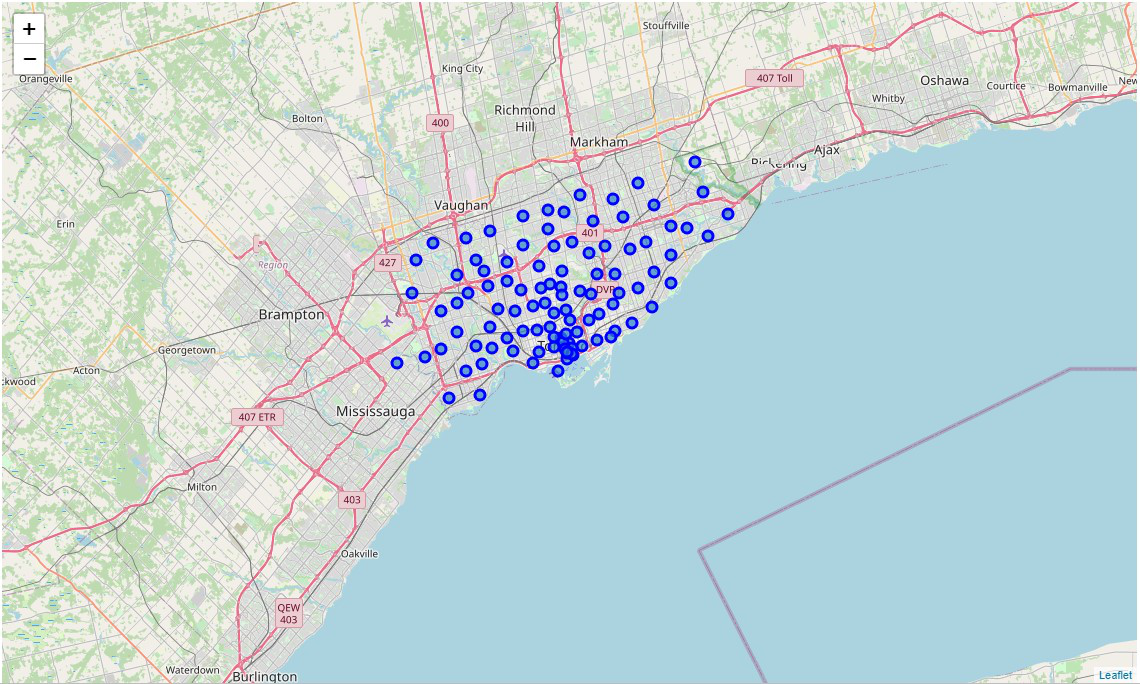

In [44]:
from PIL import Image
image = Image.open('torontomap.jpg')
image